In [177]:
%%writefile checkerboard.cpp
#define STB_IMAGE_WRITE_IMPLEMENTATION
#include "stb/stb_image_write.h"

// ospcommon
#include "ospcommon/math/vec.h"

using namespace ospcommon::math;

void writePNG(const char *fileName, const vec2i &size, const uint8_t *pixel)
{
    constexpr int nChannels {4};
    const int stride { nChannels * size.x };
    stbi_write_png(fileName, size.x, size.y, nChannels, pixel, size.x * nChannels);
}

void createTextureData(uint8_t *buffer, const vec2i& size) 
{
    int value;
    size_t idx {0};
    uint8_t pattern { 0x8 };
    for (int row = 0; row < size.x; row++) 
    {
        for (int col = 0; col < size.y; col++) 
        {
            // Each cell is 8x8, value is 0 or 255 (black or white)
            value = (((row & pattern) == 0) ^ ((col & pattern) == 0)) * 255;
            buffer[idx++] = (int)value;
            buffer[idx++] = (int)value;
            buffer[idx++] = (int)value;
            buffer[idx++] = 255;
        }
    }
}

int main(int argc, const char** argv)
{
    vec2i imgSize { std::stoi(argv[1]) };
    
    auto texture = new uint8_t[imgSize.x * imgSize.y * 4];
    
    createTextureData( texture, imgSize );
    
    writePNG("checkerboard.png", imgSize, texture);
    
    return 0;
}


Overwriting checkerboard.cpp


In [178]:
%%bash
cd build
rm -rf *
~/Tools/cmake-3.18.0-Linux-x86_64/bin/cmake .. > /dev/null 2>&1
~/Tools/cmake-3.18.0-Linux-x86_64/bin/cmake --build . --target checkerboard


Scanning dependencies of target checkerboard
[ 50%] Building CXX object CMakeFiles/checkerboard.dir/checkerboard.cpp.o
[100%] Linking CXX executable checkerboard
[100%] Built target checkerboard


In [179]:
! build/checkerboard 128

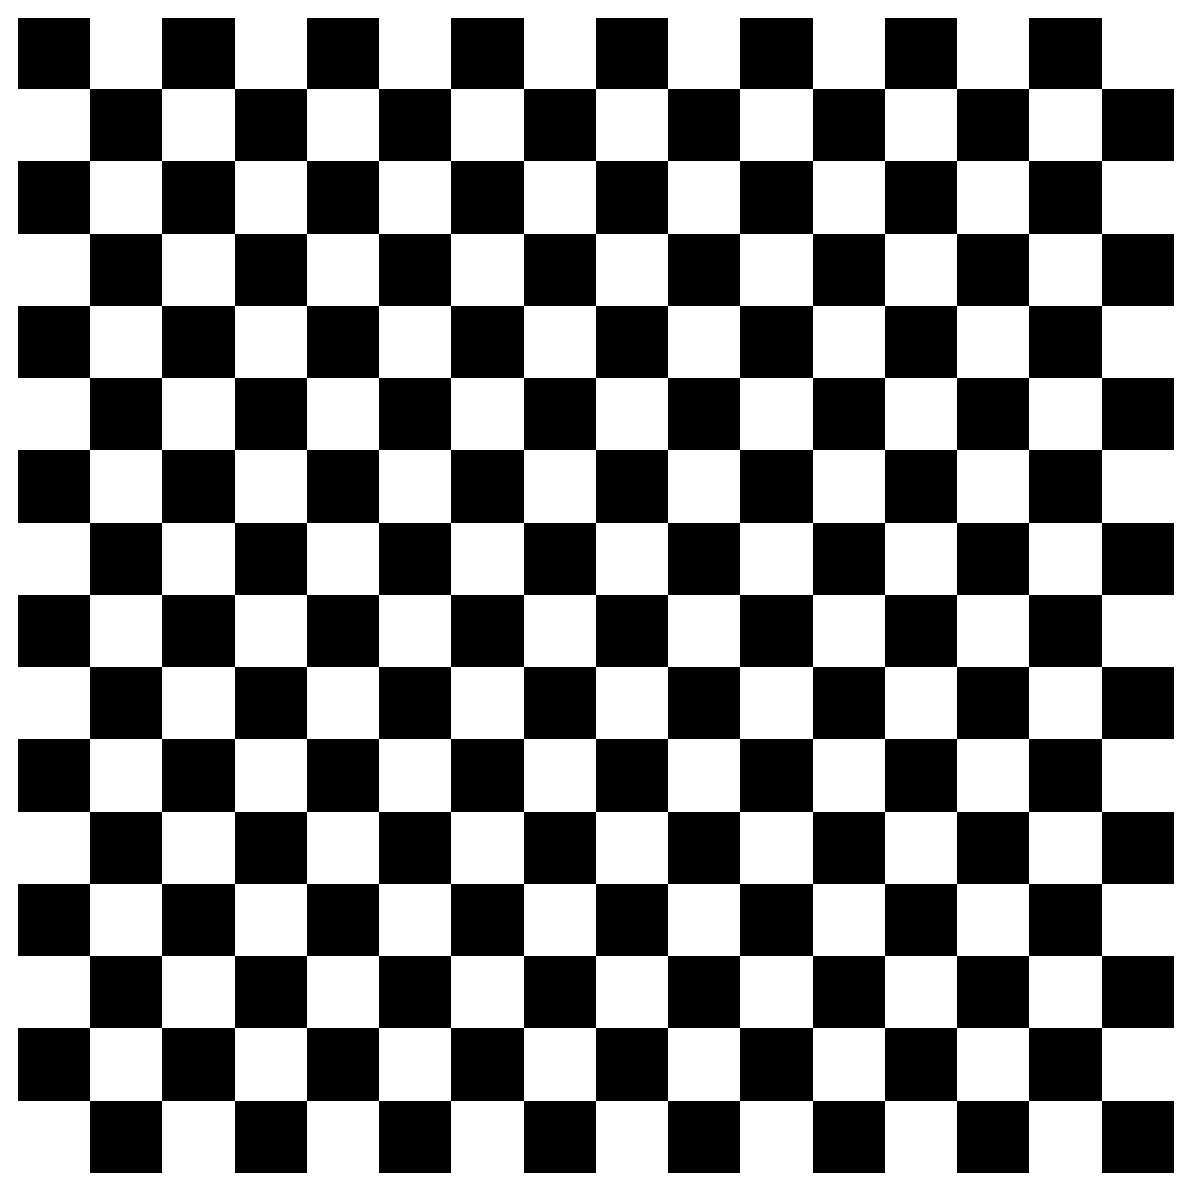

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 8.5), dpi=180, facecolor='w', edgecolor='k')

img = mpimg.imread('checkerboard.png')
plt.axis('off')
imgplot = plt.imshow(img,aspect=None,interpolation='nearest')